**Name : Pratiksha Yadav**

**Dataset : Zomato_EDA**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zomato-eda/zomato.csv


Read csv

In [2]:
df = pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# check data types
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [4]:
#check null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
new_df = df.copy() 

In [7]:
new_df.shape

(51717, 17)

In [8]:
new_df['rest_type'].head(5)

0          Casual Dining
1          Casual Dining
2    Cafe, Casual Dining
3            Quick Bites
4          Casual Dining
Name: rest_type, dtype: object

In [9]:
# split values by ','
new_df['rest_type'] = new_df['rest_type'].str.split(', ')

In [10]:
new_df['rest_type']

0              [Casual Dining]
1              [Casual Dining]
2        [Cafe, Casual Dining]
3                [Quick Bites]
4              [Casual Dining]
                 ...          
51712                    [Bar]
51713                    [Bar]
51714                    [Bar]
51715                    [Bar]
51716     [Bar, Casual Dining]
Name: rest_type, Length: 51717, dtype: object

In [11]:
# it will create a new rows for every value present in list
new_df = new_df.explode(['rest_type'])

In [12]:
new_df.rest_type

0        Casual Dining
1        Casual Dining
2                 Cafe
2        Casual Dining
3          Quick Bites
             ...      
51713              Bar
51714              Bar
51715              Bar
51716              Bar
51716    Casual Dining
Name: rest_type, Length: 59444, dtype: object

In [13]:
new_df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [14]:
new_df = new_df.explode(['listed_in(type)'])

Rename columns

In [15]:
new_df.rename(columns = {'address':'Restro_full_address','name':'Restro_name','rate':'ratings','rest_type':'resto_type','reviews_list':'reviews','location':'city','approx_cost(for two people)':'approx_cost_for_two_people'},inplace = True)

In [16]:
new_df.head(2)

,url,Restro_full_address,Restro_name,online_order,book_table,ratings,votes,phone,city,resto_type,dish_liked,cuisines,approx_cost_for_two_people,reviews,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


Drop columns

In [17]:
new_df.drop(columns = ['listed_in(city)','menu_item','reviews','url','dish_liked'], inplace=True)

In [18]:
new_df.head(2)

,Restro_full_address,Restro_name,online_order,book_table,ratings,votes,phone,city,resto_type,cuisines,approx_cost_for_two_people,listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


In [19]:
new_df.duplicated().sum()

16378

In [20]:
# drop duplicates
new_df.drop_duplicates(inplace = True)

check null values

In [21]:
new_df.isnull().sum()

Restro_full_address              0
Restro_name                      0
online_order                     0
book_table                       0
ratings                       4557
votes                            0
phone                          870
city                            14
resto_type                     163
cuisines                        35
approx_cost_for_two_people     267
listed_in(type)                  0
dtype: int64

Operation on Restaurant name (Restro_name) columns

In [22]:
# number of unique values in restro_name
new_df.Restro_name.nunique()

8792

In [23]:
#here you can see the error value / garbbage value in the name of restaurant 
new_df.Restro_name.unique()[7300:7350]

array(['WAFL CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©',
       'The CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© @ Saanchi',
       'The Lobby Lounge - Shangri-La Hotel', "Gullu's Chat",
       'Moto Store & CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©',
       'Sagar', 'Bombay Vada Pav Corner',
       'WAFL CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82

In [24]:
# all garbage values looks like below strings to replaced it with empty string
new_df['Restro_name'].replace(r'[Ã\x83]|[Â\x82]|[\x92]+','',regex=True, inplace = True)

In [25]:
new_df.Restro_name.unique()[7300:7350]

array(['B Bhagat Tarachand', 'The Golden Metro',
       'Sri Basaveshwara U.K Foods', 'North Indian Food', '37 China Town',
       'Dakshin', 'Chicken County', 'Annapoorni Grand',
       'RR Real Taste Of Bengaluru', 'RR Taste Of Bangalore',
       'Mantap Ice Cream', 'Shree Sagar Veg Fast Food',
       'New Prince Restaurant', 'Kesar Rasoi', 'Santosh Juice Junction',
       'Sri Mahalakshmi Hotel', 'Banaras Sweet House',
       'Sri Sapthagiri Sweets', 'Daivik', 'Strawberry Moon',
       'Cafe Mingos', 'Ssaffron - Shangri-La Hotel',
       'Hype - Shangri-La Hotel', 'The Sugar Factory - Le Meridien',
       'Shang Palace - Shangri-La Hotel', 'Yataii - Shangri-La Hotel',
       'Fishland', 'Caprese - Shangri-La Hotel', 'Status Bar& Restaurant',
       'Amruta', 'Lakshmi Natraja Refreshments', 'Mudde Madappa Mess',
       'The Green House Family Restaurant', 'Jashn - Le Meridien',
       'Atte Maneya Oota', 'Silver Spoon', 'Curry Pot',
       'Blue Heaven Bar And Restaurant', 'Shivaji M

Now why grouping with Restro_name and city ?

  Because it might be chances that the multiple 'city' (cities) having same restro_name (Restaurant Name) and 
the same city having multiple restaurants so you need both for grouping and replacing the null values

Operations on Restaurant City (city) column

In [26]:
new_df.loc[new_df['city'].isnull(),['Restro_full_address','city']]

,Restro_full_address,city
1662,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",NaN
13693,"Chandapura- Anakal Main Road, Oppsite Vemana H...",NaN
16351,"Kudlu Gate, Bommanahalli, Bangalore",NaN
26432,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",NaN
26519,"Koramangala 8th Block, Bangalore",NaN
27672,"6, Kathalipalya Village, 6th Cross, Koramangal...",NaN
28611,"6, Kathalipalya Village, 6th Cross, Koramangal...",NaN
33457,"80 Feet Road, Koramangala 4th Block, Bangalore",NaN
40354,"399/34, 19th Main, Near Navarang Theatre, 2nd ...",NaN
40556,"1630, 6th Main Road, AECS Layout E Block, Mara...",NaN


In [27]:
# create a group of restaurant name and address and Split the Restaurant full address by ',' and considered only of value at -2 or at -1 
address = new_df.groupby(['Restro_name','Restro_full_address']).agg({'Restro_full_address':lambda x:pd.Series.mode(x)[0]}).rename(columns = {'Restro_full_address':'addrs'})
city_l = address.reset_index()
city_l['addrs']=city_l.addrs.str.split(',').apply(lambda x: x[-2] if len(x)>1 else x[-1])
city_l

,Restro_name,Restro_full_address,addrs
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...",Devarabisanahalli
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR",HSR Layout
2,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...",Electronic City
3,#refuel,"7, Ground Floor, RR Commercial Complex, Akshay...",Bannerghatta Road
4,'Brahmins' Thatte Idli,"19, 1st main, 2nd cross, 3rd stage, 3rd block,...",Basaveshwara Nagar
...,...,...,...
12462,nu.tree,"47/7 First floor, DoddaThogur Road, Near Velan...",Electronic City
12463,nu.tree,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",Whitefield
12464,re:cess - Hilton Bangalore Embassy GolfLinks,"Hilton Bangalore Embassy GolfLinks, Embassy Go...",Domlur
12465,repEAT Hub,"67/4, Bhoganahalli Road, JCR Layout, Panathur,...",Marathahalli


In [28]:
# match the column's data and if match found replace the respective value with missing value
def add_city(x):
    return city_l.loc[(x[0]==city_l['Restro_name']) & (x[1]==city_l['Restro_full_address']),'addrs'].values[0]

new_df.loc[new_df['city'].isnull(),'city']=new_df.loc[new_df['city'].isna()].loc[:,['Restro_name','Restro_full_address']].apply(add_city,axis=1)

In [29]:
new_df['city'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', ' Bommanahalli', 'CV Raman Nagar',
       'Electronic City', 'HSR', 'Marathahalli', 'Sarjapur Road',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block',
       'Jalahalli', 'Koramangala 4th Block', 'Bellandur', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       

In [30]:
new_df['city'].isnull().sum()

0

Operation on Restaurant type

In [31]:
new_df.loc[new_df['resto_type'].isnull(),['Restro_name','city','resto_type','listed_in(type)']].head(10)

,Restro_name,city,resto_type,listed_in(type)
999,Mughlai Kitchen,BTM,NaN,Delivery
1300,Eat & Joy Restaurant,JP Nagar,NaN,Delivery
1376,Kababish Restaurant,BTM,NaN,Delivery
1565,Goli Vada Pav No 1,Bannerghatta Road,NaN,Delivery
1637,Ammi's Biryani,Bannerghatta Road,NaN,Delivery
1662,Papa Khan Rasoi,Bommanahalli,NaN,Delivery
1822,Bottle Genie,JP Nagar,NaN,Delivery
2023,Goli Vada Pav No 1,Bannerghatta Road,NaN,Dine-out
2044,Ammi's Biryani,Bannerghatta Road,NaN,Dine-out
2330,Bottle Genie,JP Nagar,NaN,Dine-out


In [32]:
# Grouping with Restaurant name and city and restaurant type(listed_in(type)) by its mode and replace this value with null value of 'Resto_type'
rest = new_df.groupby(['Restro_name','city']).agg({'listed_in(type)':pd.Series.mode})
res = rest.reset_index()
res = res.explode(['listed_in(type)'])

def add_rest_type(x):
    
    ''' This function takes Restaurant name and city as a tuple where `Restro_type` is null. Then it will compare Restro_name and city 
    columns with grouped columns resceptively and return the `listed_in(type)' values'''
    
    return res.loc[(x[0]==res['Restro_name']) & (x[1]==res['city']),'listed_in(type)'].values

# Replacing null value of resto_type with add_rest_type()'s value

new_df.loc[new_df['resto_type'].isnull(),'resto_type']=new_df[new_df['resto_type'].isnull()].loc[:,['Restro_name','city']].apply(add_rest_type,axis=1)

In [33]:
new_df = new_df.explode(['resto_type']) 
new_df.resto_type.unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk',
       'Food Truck', 'Microbrewery', 'Lounge', 'Food Court', 'Dhaba',
       'Dine-out', 'Desserts', 'Club', 'Irani Cafee', 'Bhojanalya',
       'Pop Up', 'Meat Shop', 'Buffet', 'Cafes'], dtype=object)

In [34]:
# Now you don't need listed_in(type) column
new_df.drop('listed_in(type)',axis=1,inplace=True)

In [35]:
# Replace the some of value of restro_type 
new_df['resto_type'] =new_df['resto_type'].astype(str).replace(['Dine-out','Cafes','Bhojanalya','Fine Dining','Desserts'],['Casual Dining','Cafe','Mess','Casual Dining','Dessert Parlor'])

In [36]:
new_df['resto_type'].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Beverage Shop',
       'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk', 'Food Truck',
       'Microbrewery', 'Lounge', 'Food Court', 'Dhaba', 'Club',
       'Irani Cafee', 'Pop Up', 'Meat Shop', 'Buffet'], dtype=object)

In [37]:
new_df.duplicated().sum()

14059

In [38]:
new_df.drop_duplicates(inplace = True)

In [39]:
new_df['resto_type'].isnull().sum()

0

Operation onn Approx cost for two people

In [40]:
# it contain cost with separated by ',' so you need to do some operation on it to convert it into float  
new_df.approx_cost_for_two_people.tail(10)

51620      600
51624      300
51627      300
51628    1,800
51631      250
51632      350
51641      NaN
51677      800
51677      800
51714    2,000
Name: approx_cost_for_two_people, dtype: object

In [41]:
# before converting it into float you need to replace the ','
new_df['approx_cost_for_two_people']= new_df['approx_cost_for_two_people'].str.replace(',','')

In [42]:
new_df['approx_cost_for_two_people']=new_df['approx_cost_for_two_people'].astype(float)

In [43]:
new_df[new_df['approx_cost_for_two_people'].isnull()].head()

,Restro_full_address,Restro_name,online_order,book_table,ratings,votes,phone,city,resto_type,cuisines,approx_cost_for_two_people
1662,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,Bommanahalli,Delivery,NaN,NaN
1768,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,Beverages,NaN
1795,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN
3069,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN
3774,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,Finger Food,NaN


In [44]:
def approx_cost():
    '''This function use to replace the missing values by grouping restro_name,city and 
    approx_cost_for_two_people by calculating the mean of approx_cost_for_two_people column.
  '''
    
    x=new_df.groupby(["Restro_name",'city']).agg({'approx_cost_for_two_people':np.mean})
    x.reset_index(inplace=True)
    return x[['Restro_name','approx_cost_for_two_people']]

df1=approx_cost()

In [45]:
# performing fill null values
for i in df1.values:
    try:
        if i[0] in list(new_df.loc[new_df['approx_cost_for_two_people'].isna(),'Restro_name']):
            a=float(i[1])
            if a>0:
                new_df.loc[new_df['Restro_name']==i[0],'approx_cost_for_two_people'] = a
    except:
        pass
new_df['Restro_name']

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
                               ...                        
51632                                     SeeYa Restaurant
51641                                        Andhra Spices
51677                                              Bhagini
51677                                              Bhagini
51714    Plunge - Sheraton Grand Bengaluru Whitefield H...
Name: Restro_name, Length: 29101, dtype: object

In [46]:
new_df['approx_cost_for_two_people']=new_df['approx_cost_for_two_people'].round(2)

In [47]:
new_df['approx_cost_for_two_people'].unique()

array([ 800.  ,  300.  ,  600.  ,  700.  ,  550.  ,  500.  ,  450.  ,
        650.  ,  400.  ,  900.  ,  200.  ,  750.  ,  150.  ,  850.  ,
        100.  , 1200.  ,  350.  ,  250.  ,  950.  , 1000.  ,  166.67,
       1500.  , 1300.  ,  199.  ,   80.  , 1100.  ,  160.  , 1600.  ,
        230.  ,  130.  ,   50.  ,  190.  , 1700.  ,     nan, 1400.  ,
        180.  , 1350.  , 2200.  , 2000.  , 1800.  , 1900.  ,  330.  ,
       2500.  , 2100.  , 3000.  , 2800.  , 3400.  , 1128.57,   40.  ,
       1250.  , 3500.  , 4000.  , 2400.  , 2600.  ,  120.  , 1450.  ,
        469.  ,   70.  , 3200.  ,   60.  ,  560.  ,  240.  ,  360.  ,
       6000.  , 1050.  , 2300.  , 4100.  , 5000.  , 3700.  , 1650.  ,
       2700.  , 4500.  ,  140.  ])

In [48]:
new_df.isnull().sum()

Restro_full_address              0
Restro_name                      0
online_order                     0
book_table                       0
ratings                       3381
votes                            0
phone                          610
city                             0
resto_type                       0
cuisines                        35
approx_cost_for_two_people      56
dtype: int64

Operation on Cuisines column

In [49]:
new_df.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [50]:
def add_cuisines(x):
    '''This function group the restro_name,city and cuisines by mode 
    and match the columns with x (tuple having Restro_name and city) and return the value'''
    
    a= new_df.loc[new_df['cuisines'].notna()].groupby(['Restro_name','city']).agg({'cuisines':pd.Series.mode})
    l=a.reset_index()
    return l.loc[(x[0]==l['Restro_name']) & (x[1]==l['city']),'cuisines'].values

# fill missing value with appropiate data
new_df.loc[new_df['cuisines'].isnull(),'cuisines']=new_df[new_df['cuisines'].isnull()].loc[:,['Restro_name','city']].apply(add_cuisines,axis=1)

In [51]:
new_df['cuisines']=new_df['cuisines'].str.split(', ')

In [52]:
new_df=new_df.explode('cuisines')

In [53]:
new_df.cuisines.tail()

51677          Andhra
51677    South Indian
51677         Chinese
51677    North Indian
51714     Finger Food
Name: cuisines, dtype: object

In [54]:
new_df.isnull().sum()

Restro_full_address              0
Restro_name                      0
online_order                     0
book_table                       0
ratings                       6552
votes                            0
phone                         1441
city                             0
resto_type                       0
cuisines                        35
approx_cost_for_two_people     128
dtype: int64

Operations on Ratings (ratings) column

In [55]:
new_df.ratings.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [56]:
# Here 'NEW' & '-' will replace with 0 and /5 and white space with ''
new_df['ratings'].replace(['NEW','-'],0, inplace = True)
new_df['ratings'].replace(r'[\/5 | \s]','',regex=True, inplace = True)

In [57]:
new_df.ratings.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.', nan,
       '2.6', '3.4', '4.', '2.', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [58]:
new_df.loc[new_df['ratings'].isna(),['Restro_name','city','ratings']].head()

,Restro_name,city,ratings
84,Chill Out,Banashankari,NaN
84,Chill Out,Banashankari,NaN
90,Me And My Cake,Banashankari,NaN
90,Me And My Cake,Banashankari,NaN
91,Sunsadm,Banashankari,NaN


In [59]:
new_df.loc[new_df['Restro_name']=='Bombay Kulfis',['Restro_name','city','ratings']]

,Restro_name,city,ratings
233,Bombay Kulfis,JP Nagar,NaN
1455,Bombay Kulfis,Bannerghatta Road,3.
1884,Bombay Kulfis,Bannerghatta Road,NaN
4495,Bombay Kulfis,Bellandur,NaN
6667,Bombay Kulfis,Koramangala 5th Block,3.9
7192,Bombay Kulfis,Whitefield,NaN
10243,Bombay Kulfis,BTM,NaN
11978,Bombay Kulfis,Ulsoor,NaN
16084,Bombay Kulfis,HSR,3.8
16921,Bombay Kulfis,HSR,3.4


In [60]:
new_df['ratings']=new_df['ratings'].astype('float')

In [61]:
new_df.ratings.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, nan, 2.6, 3.4, 2. , 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 1.8])

In [62]:
def add_ratings(x):
    '''Performing grouping and match the columns with respective tuple values of parameter and return the mean value'''
    
    rate= new_df.loc[new_df['ratings'].notna()].groupby(['Restro_name','city']).agg({'ratings':'mean'}).round(1)
    rate1=rate.reset_index()
    return rate1.loc[(x[0]==rate1['Restro_name']) & (x[1]==rate1['city']),'ratings'].values

# filling null value with respective mean value
new_df.loc[new_df['ratings'].isnull(),'ratings']=new_df[new_df['ratings'].isna()].loc[:,['Restro_name','city']].apply(add_ratings,axis=1)

In [63]:
new_df.ratings.astype(str).unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '0.0', '2.9', '[]',
       '2.6', '3.4', '2.0', '[3.3]', '[0.]', '2.7', '[3.2]', '[3.4]',
       '4.7', '[3.6]', '[3.9]', '2.4', '[2.8]', '2.2', '[3.1]', '2.3',
       '[3.]', '4.8', '4.9', '2.1', '[3.8]', '1.8', '[2.9]', '[1.5]',
       '[4.]', '[2.6]', '[4.3]', '[4.1]', '[3.7]', '[2.]', '[4.4]',
       '[4.2]', '[1.6]', '[1.4]'], dtype=object)

In [64]:
# here replace null values by 0 because null ratings may = 0 so instead for dropping reaplce it by 0
new_df.loc[new_df.astype(str)['ratings'] == '[]','ratings'] = 0

In [65]:
new_df['ratings']=new_df['ratings'].astype('float')

In [66]:
new_df.isnull().sum()

Restro_full_address              0
Restro_name                      0
online_order                     0
book_table                       0
ratings                          0
votes                            0
phone                         1441
city                             0
resto_type                       0
cuisines                        35
approx_cost_for_two_people     128
dtype: int64

In [67]:
new_df.duplicated().sum()

5078

In [68]:
new_df.drop_duplicates(inplace=True)

In [69]:
new_df.isnull().sum()

Restro_full_address              0
Restro_name                      0
online_order                     0
book_table                       0
ratings                          0
votes                            0
phone                         1285
city                             0
resto_type                       0
cuisines                        34
approx_cost_for_two_people      99
dtype: int64

Operation Phone column

In [70]:
new_df.loc[new_df['Restro_name']=='Jalsa',['Restro_name','phone']]

,Restro_name,phone
0,Jalsa,080 42297555\r\n+91 9743772233
0,Jalsa,080 42297555\r\n+91 9743772233
0,Jalsa,080 42297555\r\n+91 9743772233
559,Jalsa,080 42297555\r\r\r\r\n+91 9743772233
559,Jalsa,080 42297555\r\r\r\r\n+91 9743772233
559,Jalsa,080 42297555\r\r\r\r\n+91 9743772233
3462,Jalsa,080 42297555\n+91 9743772233
3462,Jalsa,080 42297555\n+91 9743772233
3462,Jalsa,080 42297555\n+91 9743772233
7607,Jalsa,+91 7406617555\r\n+91 7406627555


In [71]:
new_df['phone'] = new_df['phone'].str.split(r'\r*\n+', regex = True)

In [72]:
new_df.loc[new_df['phone'].isna(),['Restro_name','city','phone']].head(10)

,Restro_name,city,phone
121,New Mangalore Lunch Home,Banashankari,NaN
121,New Mangalore Lunch Home,Banashankari,NaN
121,New Mangalore Lunch Home,Banashankari,NaN
234,Kadamba Classic,Mysore Road,NaN
300,Just Thindi,Basavanagudi,NaN
378,Dakshin Kitchen,Basavanagudi,NaN
466,Chetty's Corner,Uttarahalli,NaN
466,Chetty's Corner,Uttarahalli,NaN
466,Chetty's Corner,Uttarahalli,NaN
467,Kapoor's Cafe,Jayanagar,NaN


In [73]:
phone_list = new_df.loc[new_df['phone'].notna()].groupby(['Restro_name','city']).agg({'phone': pd.Series.mode})
ph = phone_list.reset_index()

In [74]:
def add_phone(x):
    ''' This function match the restro_name and city with the value of parameter (tuple  value) and return the appropaite value'''
    
    return ph.loc[(x[0]==ph['Restro_name']) & (x[1]==ph['city']),'phone'].values

new_df.loc[new_df['phone'].isna(),'phone']=new_df[new_df['phone'].isna()].loc[:,['Restro_name','city']].apply(add_phone,axis=1)

In [75]:
new_df.phone

0        [080 42297555, +91 9743772233]
0        [080 42297555, +91 9743772233]
0        [080 42297555, +91 9743772233]
1                        [080 41714161]
1                        [080 41714161]
                      ...              
51677                    [080 65951222]
51677                    [080 65951222]
51677                    [080 65951222]
51677                    [080 65951222]
51714                                []
Name: phone, Length: 68353, dtype: object

In [76]:
new_df.isna().sum()

Restro_full_address            0
Restro_name                    0
online_order                   0
book_table                     0
ratings                        0
votes                          0
phone                          0
city                           0
resto_type                     0
cuisines                      34
approx_cost_for_two_people    99
dtype: int64

In [77]:
new_df.dropna(inplace=True)

**Data Visualization**

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

1. Restaurants delivering Online or not

Text(0.5, 1.0, 'Restaurants delivering Online or not')

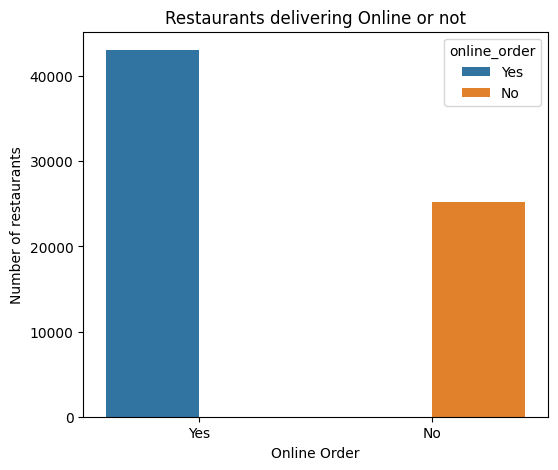

In [79]:
plt.figure(figsize= (6,5))
s = sns.countplot(data=new_df, x='online_order', hue='online_order')
s.set_xlabel('Online Order')
s.set_ylabel('Number of restaurants')
s.set_title('Restaurants delivering Online or not')

here approx 45000 Restaurant provides online order service

2. Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

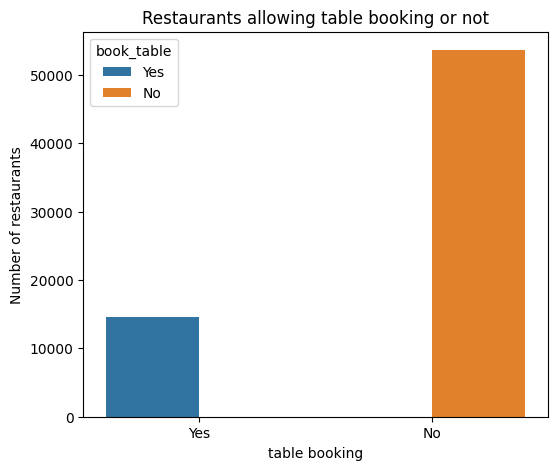

In [80]:
plt.figure(figsize= (6,5))
s = sns.countplot(data=new_df, x='book_table', hue='book_table')
s.set_xlabel('table booking')
s.set_ylabel('Number of restaurants')
s.set_title('Restaurants allowing table booking or not')

Here, you can observed that the number of restaurant gives table booking service are much less then the No table booking service

3. Table booking Rate vs Rating

Text(0.5, 1.0, 'Table booking Rate vs Ratings')

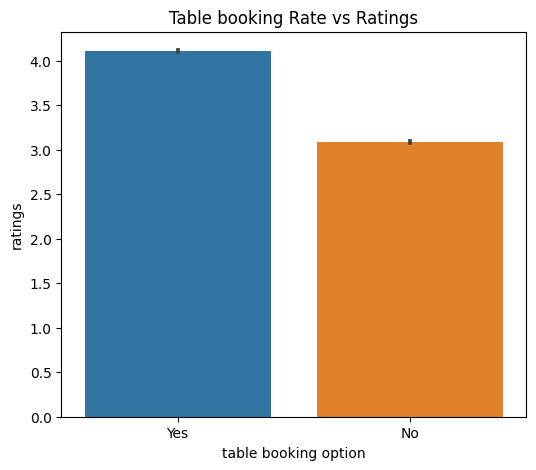

In [81]:
plt.figure(figsize= (6,5))
s = sns.barplot(data=new_df, x='book_table',y='ratings')
s.set_xlabel('table booking option')
s.set_ylabel('ratings')
s.set_title('Table booking Rate vs Ratings')

here you can say that the ratings are more for table booking service

Therefore it might be chances that people are more liking to having table booking service

4. Best Location by frequency

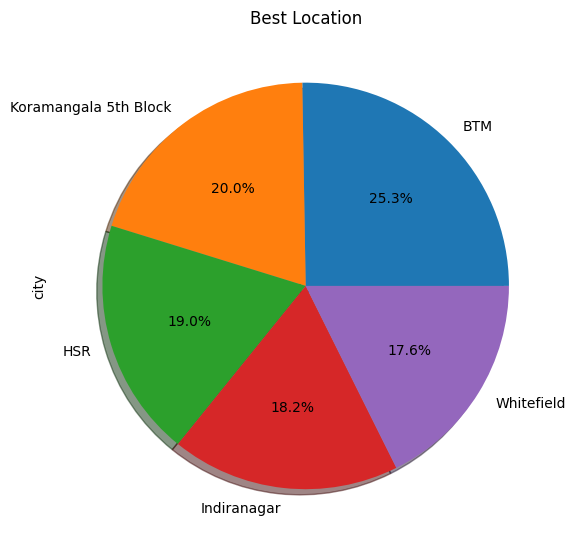

In [82]:
city_freq = new_df.groupby('city')['city'].count().sort_values(ascending = False).head(5)
city_freq.plot(kind='pie',figsize=(6,6), shadow=True, autopct='%.1f%%')
plt.title('Best Location')
plt.tight_layout()

This is the pie chart of top Cities having more Restaurants

5. Relation between Location and Rating

In [83]:
relation_loc = new_df.groupby('city').agg({'ratings':'mean'}).sort_values(by='ratings', ascending = False).head(5)

array([<Axes: ylabel='ratings'>], dtype=object)

<Figure size 2000x2000 with 0 Axes>

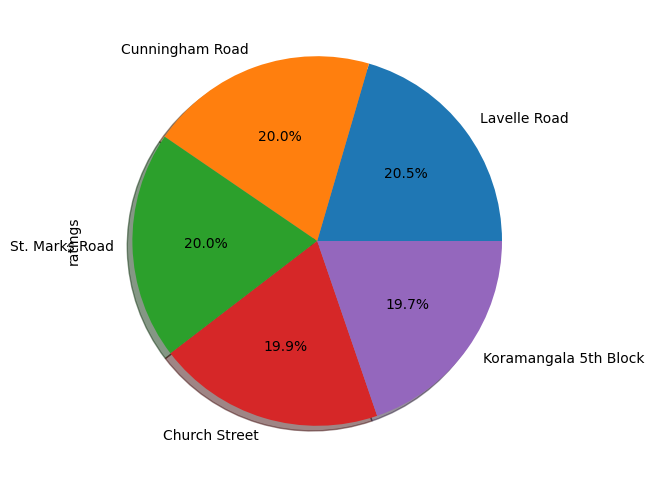

In [84]:
plt.figure(figsize= (20,20))
relation_loc.plot(subplots=True,kind='pie',figsize=(6,6), legend = False,shadow=True, autopct='%.1f%%')


6. Restaurant Type

In [85]:
rest = new_df['resto_type'].value_counts().sort_values(ascending = False)

Text(0.5, 1.0, 'Restaurant Types')

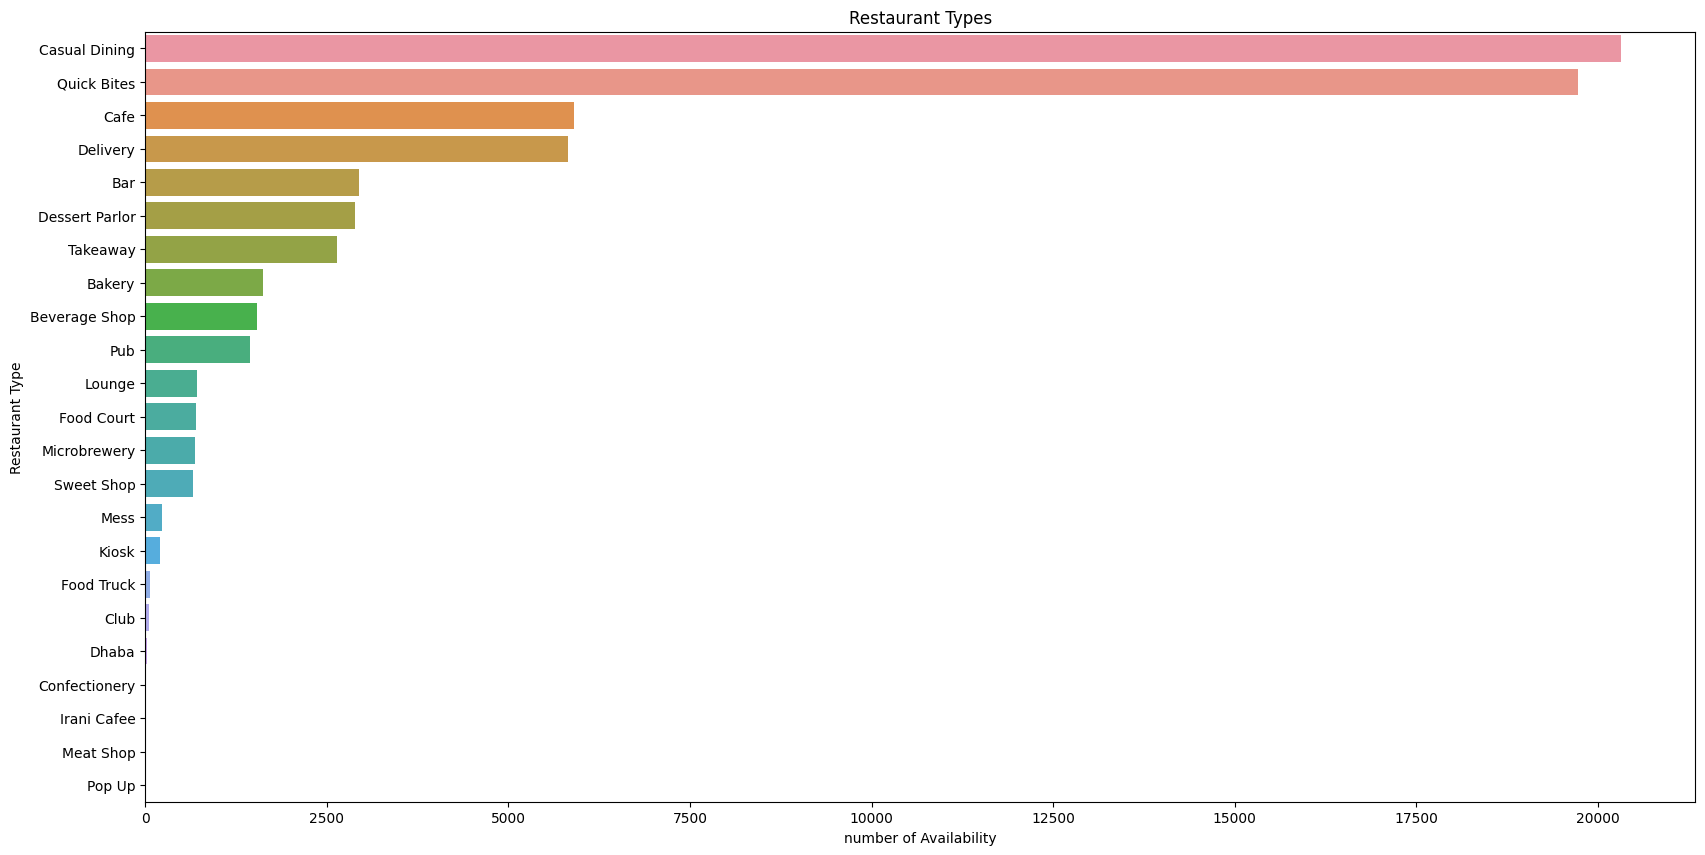

In [86]:
plt.figure(figsize= (20,10))
s = sns.barplot(y=rest.index,x=rest.values)
s.set_xlabel('number of Availability')
s.set_ylabel('Restaurant Type')
s.set_title('Restaurant Types')

The most of the Restaurants types are Quick bites or Casual Dining whereas Meat shop and Pop up are less

7. Gaussian Rest type and Rating

In [87]:
rest_rating = new_df.groupby('resto_type').agg({'ratings':'mean'})

<Axes: ylabel='Density'>

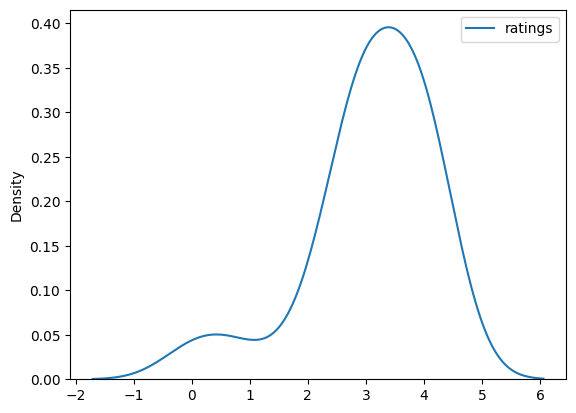

In [88]:
sns.kdeplot(data=rest_rating)

By observation you can say that the mean of ratings as more in between 3 to 4

8. Types of Services

In [89]:
services = new_df['resto_type'].value_counts().sort_values(ascending = False).head(10)
services

resto_type
Casual Dining     20322
Quick Bites       19719
Cafe               5903
Delivery           5820
Bar                2945
Dessert Parlor     2895
Takeaway           2642
Bakery             1622
Beverage Shop      1541
Pub                1440
Name: count, dtype: int64

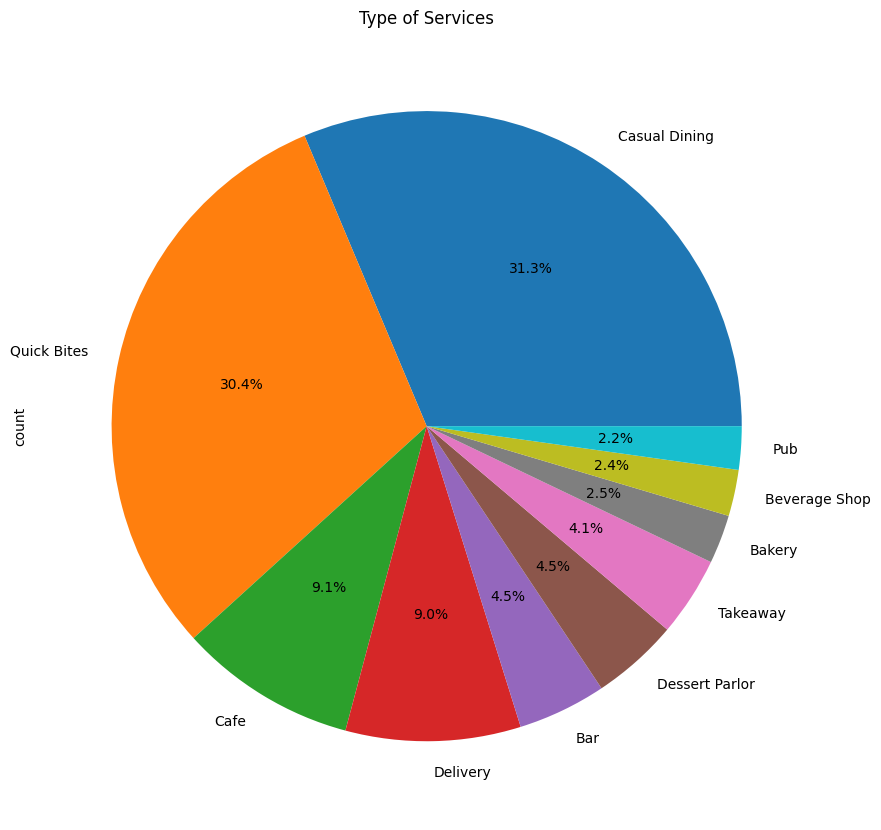

In [90]:
services.plot(kind='pie',figsize=(9,9), autopct='%.1f%%')
plt.title('Type of Services')
plt.tight_layout()

Here you can observed that Quick bites and Casual Dining are more oftenly provided by the Restaurants

10. Relation between Type and Rating

In [91]:
relation_type = new_df.groupby('resto_type').agg({'ratings':'mean'}).sort_values(by='ratings',ascending=False)

Text(0.5, 1.0, 'Relation between Restaurant type & Ratings')

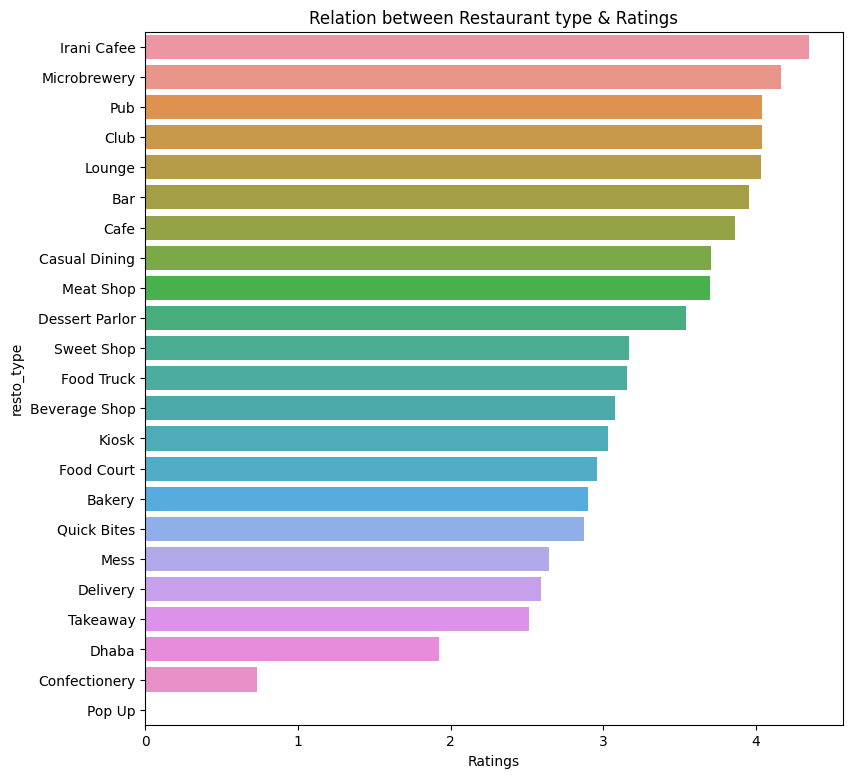

In [92]:
plt.figure(figsize= (9,9))
s = sns.barplot(data= relation_type, x='ratings',y = relation_type.index)
s.set_xlabel('Ratings')
s.set_title('Relation between Restaurant type & Ratings')

Irani Cafe, Microbrewery, Club and Pub having more ratings

11. Cost of Restaurant

In [93]:
approx_cost = new_df.groupby('Restro_name').agg({'approx_cost_for_two_people':'mean'}).sort_values(by= 'approx_cost_for_two_people',ascending = False).head(10)

Text(0.5, 1.0, 'Cost of Restaurant')

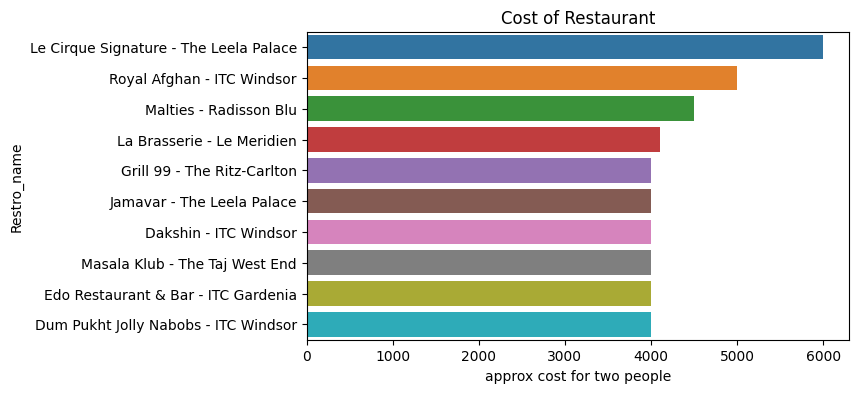

In [94]:
plt.figure(figsize= (7,4))
s = sns.barplot(data = approx_cost,y= approx_cost.index, x ='approx_cost_for_two_people')
s.set_xlabel('approx cost for two people')
s.set_title('Cost of Restaurant')

Some Restaurants in the city are more expensive for two person here, Le Cirque Signature - The Leela Palace takes approx Rs. 3000/person

11. No. of restaurants in a Location

In [95]:
rest_city = new_df.groupby('city').agg({'Restro_name':'count'}).sort_values(by='Restro_name',ascending = False).head(10)

Text(0.5, 1.0, 'Number of restaurants in a Location')

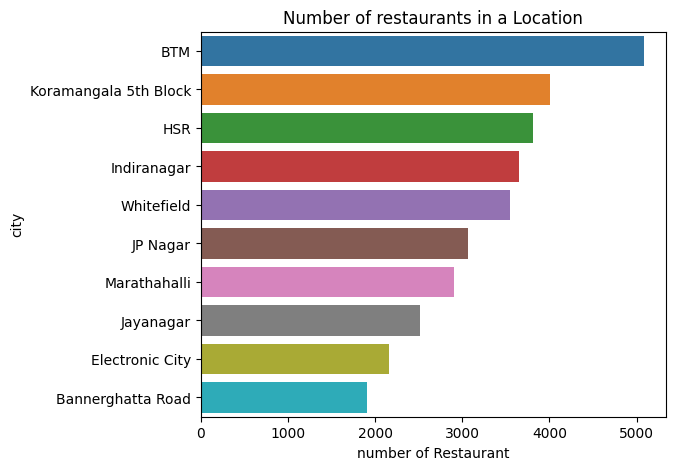

In [96]:
plt.figure(figsize= (6,5))
s = sns.barplot(data=rest_city,x='Restro_name', y=rest_city.index)
s.set_xlabel('number of Restaurant')
s.set_ylabel('city')
s.set_title('Number of restaurants in a Location')

BTM having more Restaurants where as Bannerghatta Road having less Restaurants

12. Most famous restaurant chains in Bengaluru

In [97]:
rest_vote = new_df.groupby('Restro_name').agg({'ratings':'sum','votes':'sum'})
vote = rest_vote.sort_values(by='votes', ascending=False).head(10)
rate = rest_vote.sort_values(by='ratings', ascending=False).head(10)

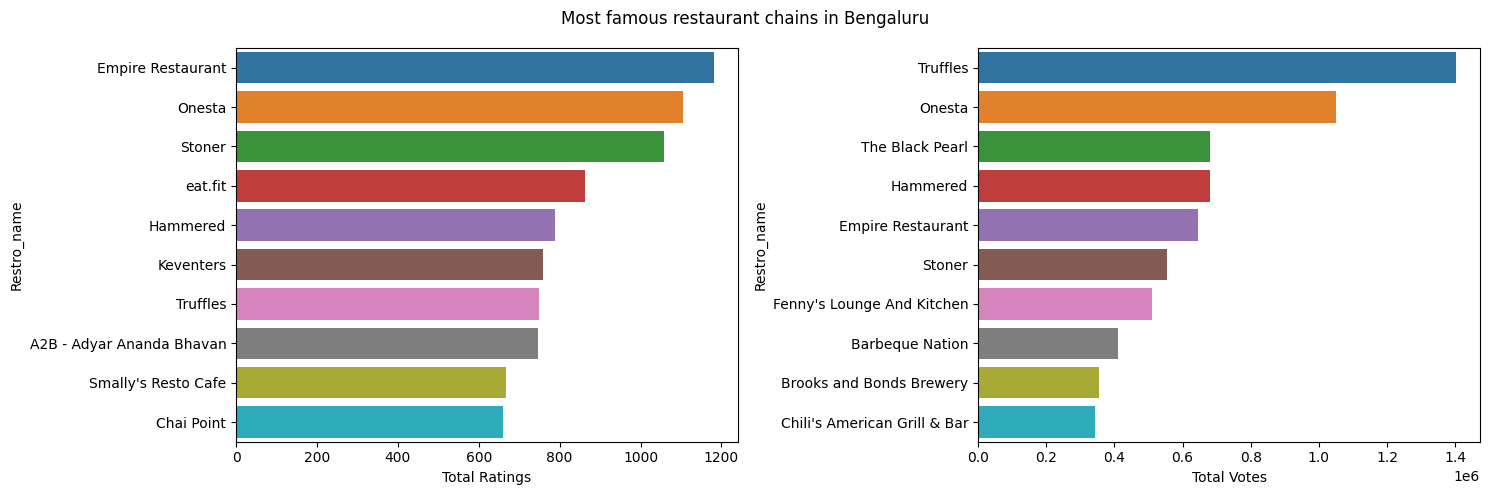

In [98]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5)) 
s = sns.barplot(data=rate,x= 'ratings', y=rate.index,ax=axes[0])
s.set_xlabel('Total Ratings')
s.set_ylabel('Restro_name')

s = sns.barplot(data=vote,x='votes', y=vote.index, ax=axes[1])
s.set_xlabel('Total Votes')
s.set_ylabel('Restro_name')
plt.suptitle('Most famous restaurant chains in Bengaluru')

plt.tight_layout()

The most Famous Restaurant Chain in the city are Empire Restaurant with highest votes and Truffles with highest ratings. But Onesta is on top with ratings as well as by votes

In [99]:
new_df.head()

,Restro_full_address,Restro_name,online_order,book_table,ratings,votes,phone,city,resto_type,cuisines,approx_cost_for_two_people
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"[080 42297555, +91 9743772233]",Banashankari,Casual Dining,North Indian,800.0
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"[080 42297555, +91 9743772233]",Banashankari,Casual Dining,Mughlai,800.0
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"[080 42297555, +91 9743772233]",Banashankari,Casual Dining,Chinese,800.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,[080 41714161],Banashankari,Casual Dining,Chinese,800.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,[080 41714161],Banashankari,Casual Dining,North Indian,800.0


# Thank You...!